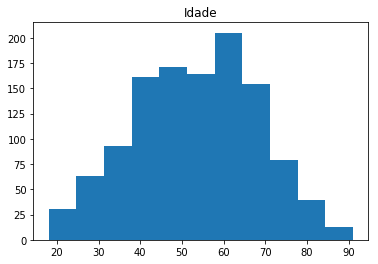

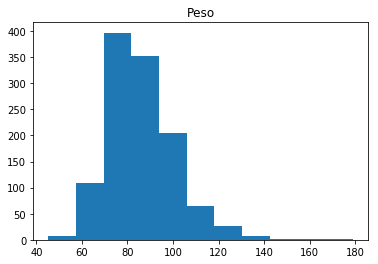

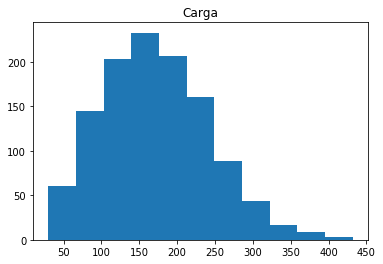

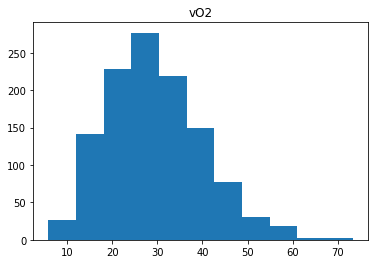

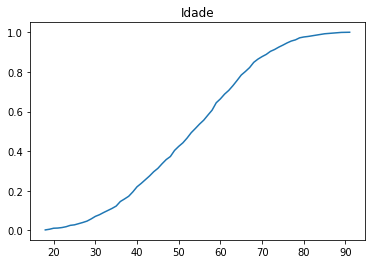

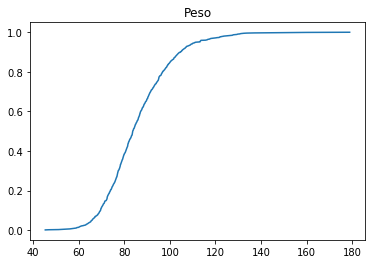

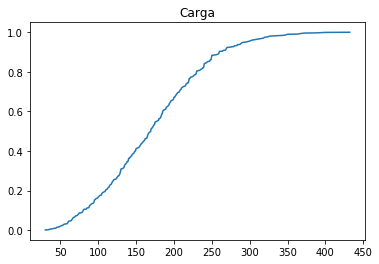

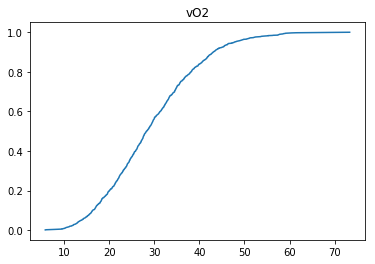

217.26773389905532 53.29095563139932 217.45327423543367 14.746296966880656


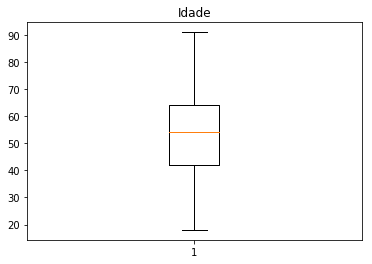

218.82688514797786 85.92577645051195 219.0137569542528 14.799113384059629


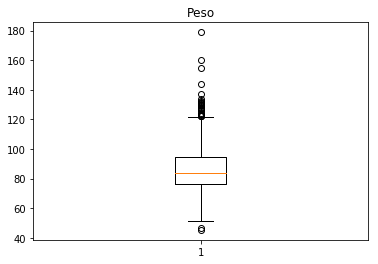

4908.8539660042625 172.27150170648466 4913.0459847625925 70.093123662472


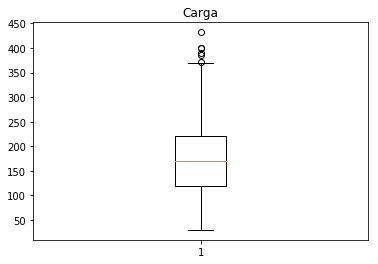

110.09823462936261 29.39472792315316 110.19225532503243 10.497249893426012


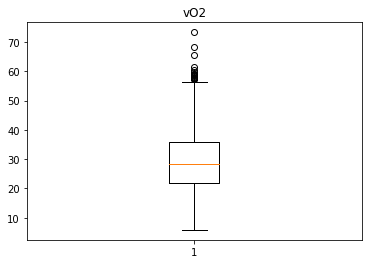

In [82]:
import numpy
import math
import matplotlib.pyplot as plot
import scipy.stats as sc

class info:
        def __init__(self,nome):
                #Atributos gerais
                self.nome=nome        
                self.dados=[]
                #Atributos para distribuição:
                self.ordem=[]
                self.x=[]
                self.dist=[]
                #Atributos estatísticos:
                self.media=0
                self.var=0
                self.rvar=0
                #Atributos para parametrização:
                self.eLambda=0
                self.logmedia=0
                self.logvar=0
                self.wshape=0
                self.wloc=0
                self.wscale=0


idade=info('Idade')
peso=info('Peso')
carga=info('Carga')
vo2=info('vO2')
informacoes=[idade,peso,carga,vo2]



#Ler o arquivo:
with open("Dados-medicos.csv") as dados:
        for linha in dados:
                linha=linha.split()
                try: #Corrige a leitura da primeira linha, que vinha errada
                        idade.dados+=[int(linha[0])]
                except: idade.dados+=[49]
                peso.dados+=[float(linha[1])]
                carga.dados+=[float(linha[2])]
                vo2.dados+=[float(linha[3])]

#Corrige o primeiro item que era lido incorretamente

#1)

numintervalos=int(1+3.3*math.log(len(idade.dados),10))# Dá o número de intervalos

for parametro in informacoes:
        plot.hist(parametro.dados,numintervalos)
        plot.title('%s' % parametro.nome)
        plot.show()


for parametro in informacoes:
    parametro.ordem=numpy.sort(parametro.dados)
    parametro.x=numpy.unique(parametro.ordem)
    k=0
    for i in range(len(parametro.ordem))[::-1]:
        if parametro.ordem[i]!=k:
            parametro.dist=[(i+1)/len(parametro.ordem)]+parametro.dist
            k=parametro.ordem[i]
    plot.plot(parametro.x,parametro.dist)
    plot.title('%s' % parametro.nome)
    plot.show()

    

#2)
for parametro in informacoes:
        parametro.media=numpy.mean(parametro.dados)
        parametro.var=numpy.var(parametro.dados)
        parametro.rvar=numpy.var(parametro.dados, ddof=1)
        print(parametro.var,parametro.media, parametro.rvar, parametro.rvar**0.5)
        plot.boxplot(parametro.dados)
        plot.title('%s' % parametro.nome)
        plot.show()

In [83]:
#3
for parametro in informacoes:
    parametro.eLambda  =(len(parametro.dados))/(numpy.sum(parametro.dados))
    for i in parametro.dados:
        parametro.logmedia+=math.log(i)
    parametro.logmedia=parametro.logmedia/len(parametro.dados)
    for i in parametro.dados:
        parametro.logvar+=(math.log(i)-parametro.logmedia)**2
    parametro.logvar=parametro.logvar/len(parametro.dados)
    

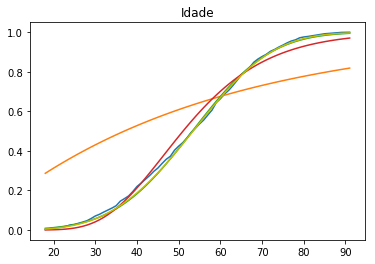

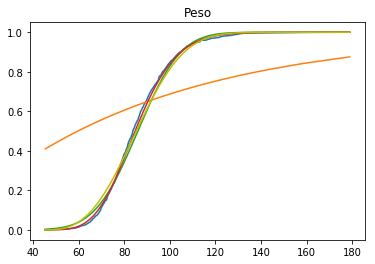

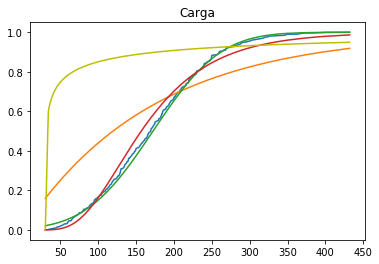

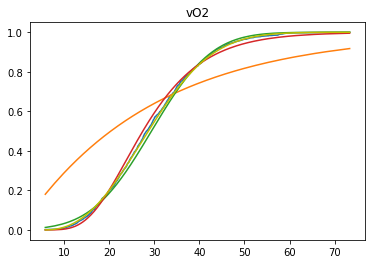

In [84]:
for parametro in informacoes:
    plot.plot(parametro.x,parametro.dist)
    plot.plot(parametro.x,1-numpy.exp(-parametro.eLambda*parametro.x))
    plot.plot(parametro.x,sc.norm.cdf(parametro.x,parametro.media,(parametro.var)**0.5))
    plot.plot(parametro.x,sc.lognorm.cdf(parametro.x,(parametro.logvar)**0.5,scale=math.exp(parametro.logmedia)))
    parametro.wshape, parametro.wloc, parametro.wscale=sc.weibull_min.fit(parametro.ordem)
    plot.plot(parametro.x,sc.weibull_min.cdf(parametro.x,parametro.wshape, parametro.wloc, parametro.wscale),color='y')
    plot.title('%s' % parametro.nome)
    plot.show()
    

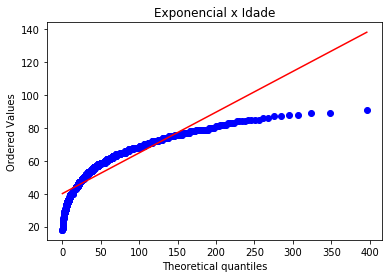

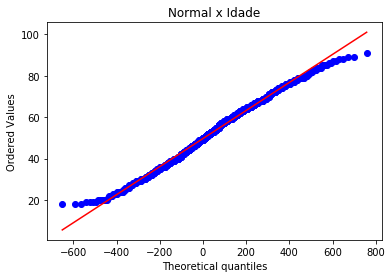

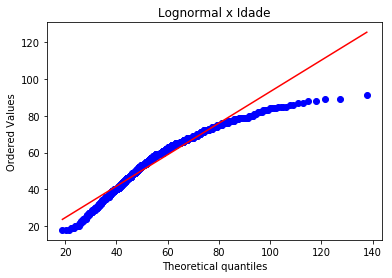

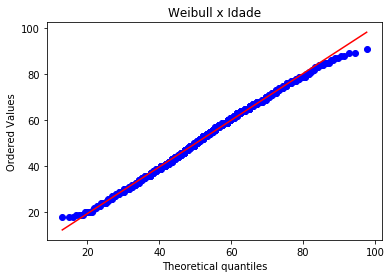

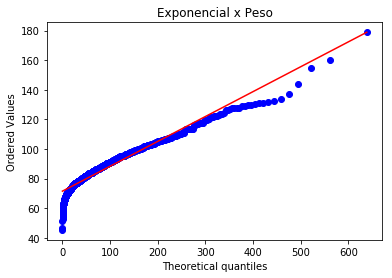

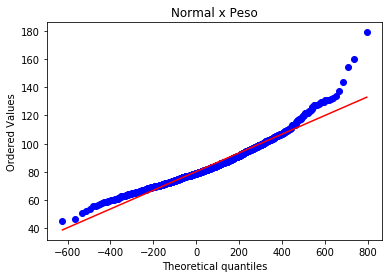

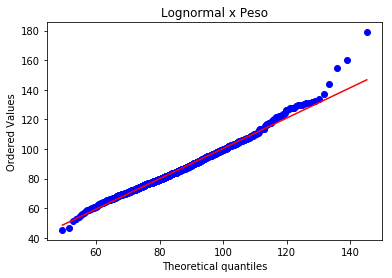

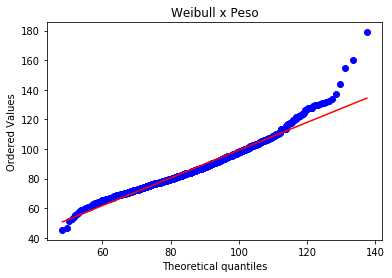

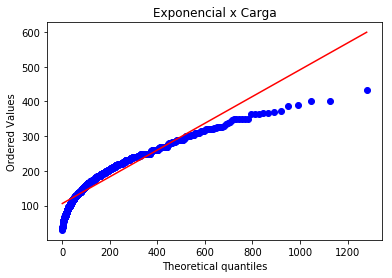

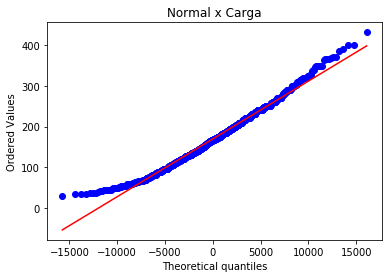

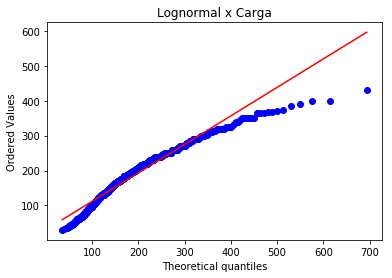

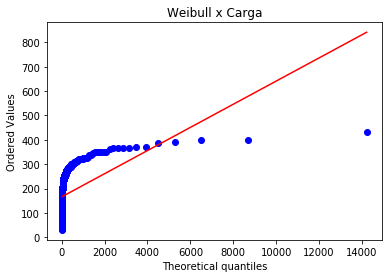

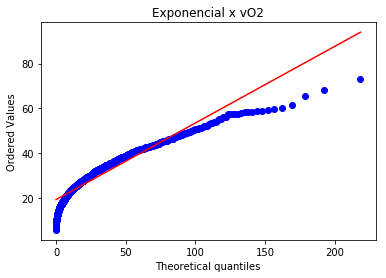

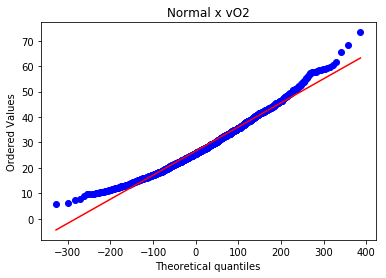

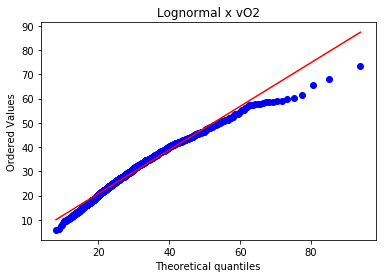

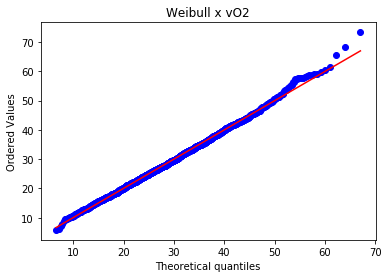

In [85]:
#4
for parametro in informacoes:
    a=sc.probplot(parametro.ordem,dist=sc.expon(scale=(1/parametro.eLambda)),plot=plot)
    plot.title('Exponencial x %s' % parametro.nome)
    plot.show()
    b=sc.probplot(parametro.ordem,dist=sc.norm(loc=parametro.media,scale=parametro.var),plot=plot)
    plot.title('Normal x %s' % parametro.nome)
    plot.show()
    c=sc.probplot(parametro.ordem,dist=sc.lognorm(s=(parametro.logvar)**0.5,scale=math.exp(parametro.logmedia)),plot=plot)
    plot.title('Lognormal x %s' % parametro.nome)
    plot.show()
    d=sc.probplot(parametro.ordem,dist=sc.weibull_min(c=parametro.wshape, loc=parametro.wloc, scale=parametro.wscale),plot=plot)
    plot.title('Weibull x %s' % parametro.nome)
    plot.show()

In [86]:
#5
d=1.36/((len(idade.dados))**0.5)#d adequado para a situação
print(d)

for parametro in informacoes:
    comp=numpy.array(parametro.dist)
    D=abs(numpy.amax(comp-1-numpy.exp(-parametro.eLambda*parametro.x)))
    print('Exponencial x %s, D=%s,' % (parametro.nome,D) , D<=d)
    D=abs(numpy.amax(comp-sc.norm.cdf(parametro.x,parametro.media,(parametro.var)**0.5)))
    print('Normal x %s, D=%s,' % (parametro.nome,D) , D<=d)
    D=abs(numpy.amax(comp-sc.lognorm.cdf(parametro.x,(parametro.logvar)**0.5,scale=math.exp(parametro.logmedia))))
    print('Lognormal x %s, D=%s,' % (parametro.nome,D) , D<=d)
    D=abs(numpy.amax(comp-sc.weibull_min.cdf(parametro.x,parametro.wshape, parametro.wloc, parametro.wscale)))
    print('Weibull x %s, D=%s,' % (parametro.nome,D) , D<=d)

0.03972602417291505
Exponencial x Idade, D=0.1812991529175936, False
Normal x Idade, D=0.03652647331773384, True
Lognormal x Idade, D=0.04849994969519944, False
Weibull x Idade, D=0.032526201600059146, True
Exponencial x Peso, D=0.12467692544752353, False
Normal x Peso, D=0.06661818817785059, False
Lognormal x Peso, D=0.032285259002666544, True
Weibull x Peso, D=0.053876091468783915, False
Exponencial x Carga, D=0.08145785126816553, False
Normal x Carga, D=0.039233911356943985, True
Lognormal x Carga, D=0.041088954019442125, False
Weibull x Carga, D=0.053338042200479885, False
Exponencial x vO2, D=0.08251473172081891, False
Normal x vO2, D=0.044531849851028094, False
Lognormal x vO2, D=0.02608434658207448, True
Weibull x vO2, D=0.020422580685310665, True


-0.6300720192503425
-0.4485209711821948 53.29683909817564


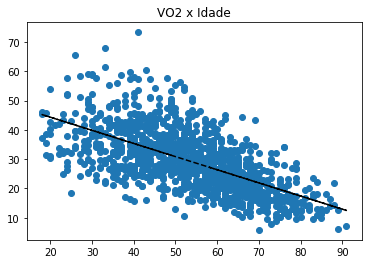

-0.174400618296308
-0.12370517235149077 40.024190908399405


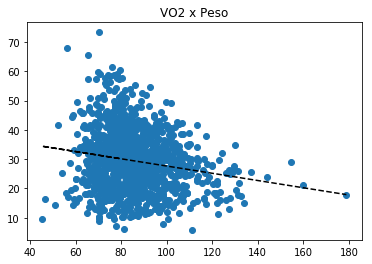

0.8783256094059618
0.13153934263406894 6.73424783409828


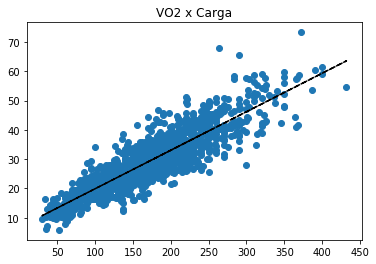

In [87]:
#6
for parametro in informacoes[:3]:
    xs=[i-parametro.media for i in parametro.dados]
    ys=[i-vo2.media for i in vo2.dados]
    numerador=0
    for i in range(len(xs)):
        numerador+=xs[i]*ys[i]
    xs=numpy.power(xs,2)
    ys=numpy.power(ys,2)
    demx=(numpy.sum(xs))**0.5
    demy=(numpy.sum(ys))**0.5
    print(numerador/(demx*demy))
    linha=sc.linregress(parametro.dados,vo2.dados)
    a,b=linha[0],linha[1]
    print(a,b)
    plot.scatter(parametro.dados, vo2.dados)
    plot.plot(parametro.dados,a*numpy.array(parametro.dados)+b, linestyle='--', color='k')
    plot.title('VO2 x %s' % parametro.nome)
    plot.show()

In [119]:
#7
intervalo=(carga.ordem[-1]-carga.ordem[0])/numintervalos
tabela1=[[0 for i in range(5)] for i in range(numintervalos)]
soma1=0

for inter in range(numintervalos):
    tabela1[inter][0]=('[ %.4f , %.4f )' % (carga.ordem[0]+inter*intervalo,carga.ordem[0]+(inter+1)*intervalo))
tabela1[numintervalos-1][0]=tabela1[numintervalos-1][0][:-1]+']'


for i in range(len(carga.dados)):
    for j in range(numintervalos):
        if carga.dados[i]>=carga.ordem[0]+j*intervalo and carga.dados[i]<carga.ordem[0]+(j+1)*intervalo:
            tabela1[j][1]+=1
            if vo2.dados[i]<35: tabela1[j][2]+=1
for i in range(len(carga.dados)): 
    if carga.dados[i]==carga.ordem[-1]: 
        tabela1[j][1]+=1
        if vo2.dados[i]<35: tabela1[j][2]+=1

for i in range(len(tabela1)):
    tabela1[i][2]=tabela1[i][2]/tabela1[i][1]
    tabela1[i][1]=tabela1[i][1]/len(carga.dados)
    tabela1[i][3]=tabela1[i][1]*tabela1[i][2]
    soma1+=tabela1[i][3]
for i in range(len(tabela1)):
    tabela1[i][4]=tabela1[i][3]/soma1

bayes1=tabela1
bs1=soma1


print(numpy.array(bayes1))
print(bs1)


tabela1=[[0 for i in range(5)] for i in range(numintervalos)]
soma1=0

for inter in range(numintervalos):
    tabela1[inter][0]=('[ %.4f , %.4f )' % (carga.ordem[0]+inter*intervalo,carga.ordem[0]+(inter+1)*intervalo))
tabela1[numintervalos-1][0]=tabela1[numintervalos-1][0][:-1]+']'


for i in range(len(carga.dados)):
    for j in range(numintervalos):
        if carga.dados[i]>=carga.ordem[0]+j*intervalo and carga.dados[i]<carga.ordem[0]+(j+1)*intervalo:
            tabela1[j][1]+=1
            if vo2.dados[i]>=35: tabela1[j][2]+=1
for i in range(len(carga.dados)): 
    if carga.dados[i]==carga.ordem[-1]: 
        tabela1[j][1]+=1
        if vo2.dados[i]>=35: tabela1[j][2]+=1

for i in range(len(tabela1)):
    tabela1[i][2]=tabela1[i][2]/tabela1[i][1]
    tabela1[i][1]=tabela1[i][1]/len(carga.dados)
    tabela1[i][3]=tabela1[i][1]*tabela1[i][2]
    soma1+=tabela1[i][3]
for i in range(len(tabela1)):
    tabela1[i][4]=tabela1[i][3]/soma1


bayes2=tabela1
bs2=soma1

print(numpy.array(bayes2))
print(bs2)


ultimo=[]
for i in range(len(bayes1)):
    ultimo+=[bayes1[i][-1]*bayes2[i][2]]
print (ultimo)
print (numpy.sum(ultimo))






[['[ 30.0000 , 66.5455 )' '0.05204778156996587' '1.0'
  '0.05204778156996587' '0.07210401891252956']
 ['[ 66.5455 , 103.0909 )' '0.12372013651877133' '1.0'
  '0.12372013651877133' '0.17139479905437355']
 ['[ 103.0909 , 139.6364 )' '0.17320819112627986' '0.9901477832512315'
  '0.17150170648464164' '0.23758865248226954']
 ['[ 139.6364 , 176.1818 )' '0.19880546075085323' '0.9356223175965666'
  '0.18600682593856654' '0.2576832151300237']
 ['[ 176.1818 , 212.7273 )' '0.1766211604095563' '0.6908212560386473'
  '0.12201365187713309' '0.16903073286052012']
 ['[ 212.7273 , 249.2727 )' '0.13737201365187712' '0.37888198757763975'
  '0.05204778156996587' '0.07210401891252956']
 ['[ 249.2727 , 285.8182 )' '0.07593856655290103' '0.15730337078651685'
  '0.011945392491467578' '0.016548463356974']
 ['[ 285.8182 , 322.3636 )' '0.03754266211604096' '0.06818181818181818'
  '0.002559726962457338' '0.0035460992907801426']
 ['[ 322.3636 , 358.9091 )' '0.014505119453924915' '0.0' '0.0' '0.0']
 ['[ 358.9091 , 